In [1]:
import numpy as np
from mask_utils import *
import matplotlib.pyplot as plt
import matplotlib_inline
import astropy.io.fits as pyfits 
from astropy.table import Table, Column

In [2]:
#Get mask info and generate coordinates array
with pyfits.open('wfm_mask.fits') as hdu_list:     
    header0 = hdu_list[0].header
    MDDIST = header0['MDDIST']
    
    header = hdu_list[2].header
    ELXDIM = header['ELXDIM']
    ELYDIM = header['ELYDIM']
    ELXN   = header['ELXN']
    ELYN   = header['ELYN']

In [3]:
#Generate pixel coords (centers) in mask reference frame
xcoords = np.arange(0, ELXDIM * ELXN, ELXDIM) + ELXDIM/2 - (ELXDIM * ELXN)/2
ycoords = np.arange(0, ELYDIM * ELYN, ELYDIM) + ELYDIM/2 - (ELYDIM * ELYN)/2

In [4]:
#Read bulk
bulk = read_mask_bulk('wfm_mask.fits', 4)

Filename: wfm_mask.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      28   ()      
  1  OR_MASK       1 BinTableHDU     36   676000R x 3C   [E, E, E]   
  2  MASK          1 BinTableHDU     36   676000R x 3C   [E, E, E]   
  3  RMATRIX       1 BinTableHDU     38   676000R x 3C   [E, E, E]   
  4  SENS          1 BinTableHDU     36   676000R x 3C   [E, E, E]   


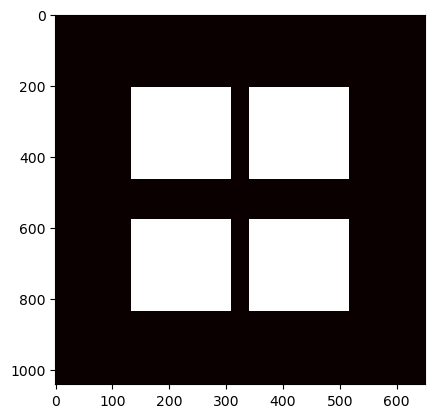

In [5]:
plt.imshow(bulk, cmap='hot', interpolation='nearest', aspect=ELXDIM/ELYDIM)
plt.show()

In [6]:
#Calculate viewing solid angle for each pixel
omega = solid_angle(bulk, ELXDIM, ELYDIM, MDDIST)

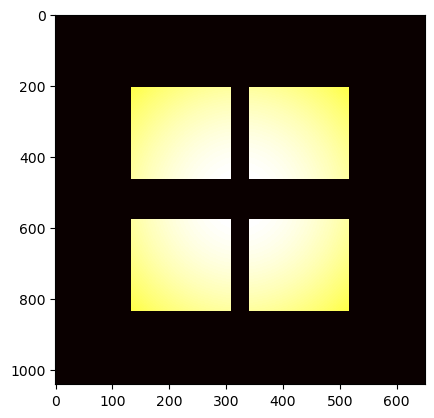

In [7]:
plt.imshow(omega, cmap='hot', interpolation='nearest', aspect=ELXDIM/ELYDIM)
plt.show()

In [8]:
#Read detector image

#with pyfits.open('cxb_2-50keV_10ks_cam1a_detected.fits') as hdu_list:
with pyfits.open('cxb_2-50keV_10ks_infthinmask_cam1a_detected.fits') as hdu_list:
    data=Table(hdu_list[1].data)
    xedges = xcoords-ELXDIM/2
    xedges = np.append(xedges, xcoords[-1] + ELXDIM/2)

    yedges = ycoords-ELYDIM/2
    yedges = np.append(yedges, ycoords[-1] + ELYDIM/2)
 
    bkg_det, _, _ = np.histogram2d( data["X"], data["Y"], bins=(xedges, yedges) )

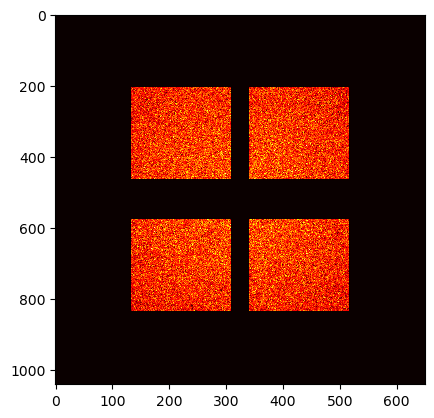

In [9]:
plt.imshow(bkg_det, cmap='hot', interpolation='nearest', aspect=ELXDIM/ELYDIM)
plt.show()

In [10]:
#Calculate mean quantities
mean = np.mean(bkg_det[np.nonzero(omega)]/omega[np.nonzero(omega)])
stddev = np.std(bkg_det[np.nonzero(omega)]/omega[np.nonzero(omega)])
print(mean, np.sqrt(mean))
print(stddev)


13.250350636900931 3.6401031080040758
3.685240422695518


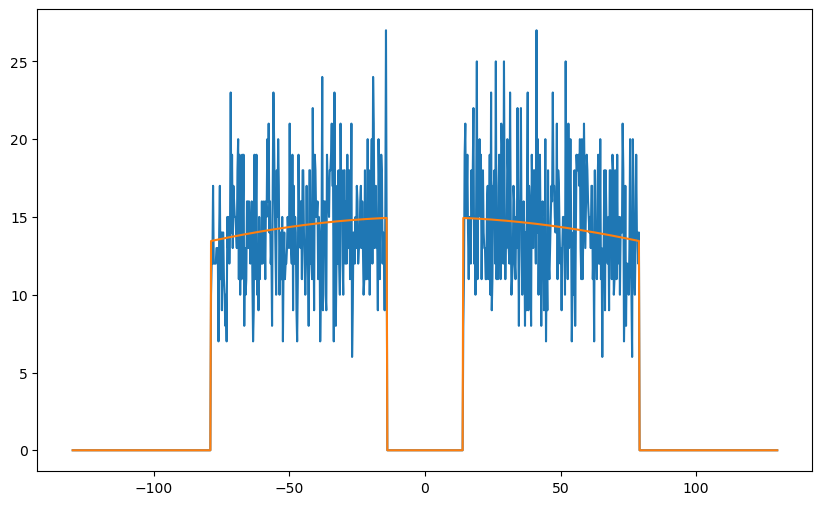

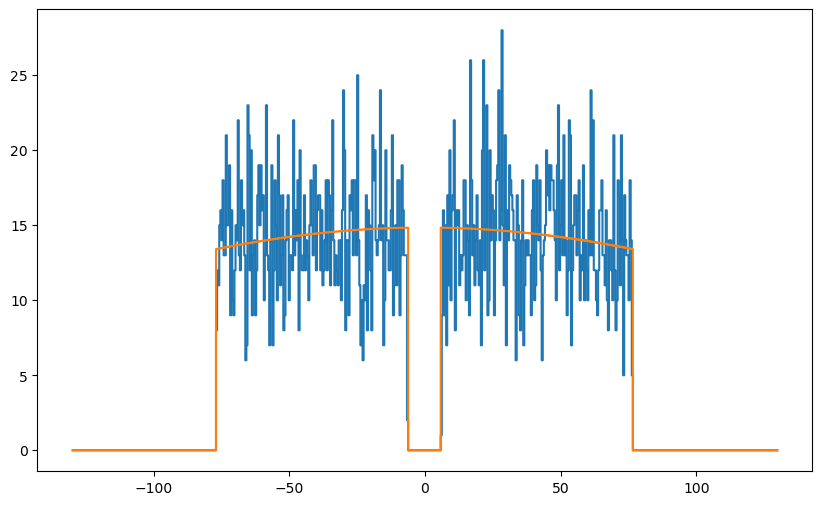

In [11]:
row, col = 200, 300

slicex_bkg = bkg_det[:, row]
slicey_bkg = bkg_det[col, :]

slicex_omega = omega[:, row]
slicey_omega = omega[col, :]


plt.figure(figsize=(10, 6))
plt.plot(xcoords, slicex_bkg)
plt.plot(xcoords, slicex_omega*mean)

#plt.plot(xcoords, slicex*16)
plt.show()

plt.figure(figsize=(10, 6))
plt.step(ycoords, slicey_bkg)
plt.step(ycoords, slicey_omega*mean)
plt.show()